# Tornado Synthetic Dataset - 3D Steady
> [cgl datasets](https://cgl.ethz.ch/research/visualization/data.php)
> Steady means no time is involved

In [29]:
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [40]:
file = '.\\Data\\tornado3d.vti'
mesh = pv.read(file)
print(mesh)

Dataset Dimensions : (128, 128, 128)


# Matplotlib Section

In [31]:
# Reshape the data points
z = mesh.points[:, 0]
y = mesh.points[:, 1]
x = mesh.points[:, 2]
x.shape = y.shape = z.shape = mesh.dimensions # 128x128x128

In [32]:
# Get the magnitude from the vector data
w,v,u = mesh.point_data['w'], mesh.point_data['v'], mesh.point_data['u']
w.shape = v.shape = u.shape = mesh.dimensions
mag = (np.sqrt(u**2 + v**2 + w**2))

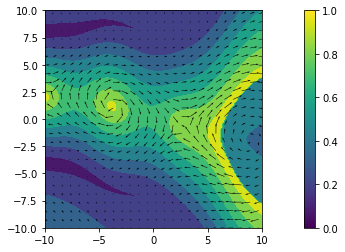

In [33]:
# 2D Slicing
sample = 5 # sample every 5 points
slice = 64 # slicing middle of plot
# plt.imshow(mag[:, :, 0])
plt.contourf(x[:, :, slice],y[:, :, slice],mag[:, :, slice])
plt.quiver(x[::sample, ::sample, slice],y[::sample, ::sample, slice],u[::sample, ::sample, slice], v[::sample, ::sample, slice])
plt.colorbar()
plt.axis('square')
plt.show()

# Pyvista Section

In [34]:
# ADD CAMERA
# camera = pv.Camera()
# plotter.camera.position = (15, 15, 15)
# plotter.camera.focal_point = (0,0,0)
# plotter.camera = camera

In [35]:
# Get the magnitude from the vector data
wp,vp,up = mesh.point_data['w'], mesh.point_data['v'], mesh.point_data['u']
magp = (np.sqrt(u**2 + v**2 + w**2))

In [36]:
samp = 10

points = mesh.points
points = points[::samp]

vectors = np.vstack((wp,vp,up)).T
vectors = vectors[::samp]

d:\workspace\USU\CS6950-DirectedReadings\VTK\vtk-py-env\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


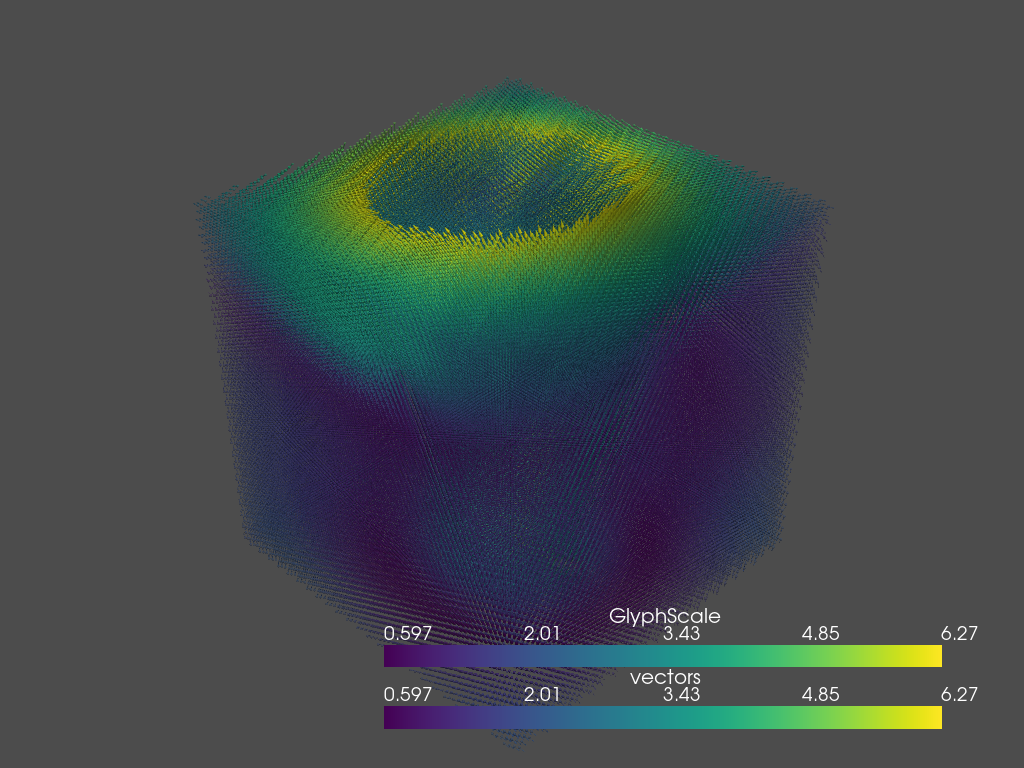

In [37]:
# POINT CLOUD
plotter = pv.Plotter()
point_cloud = pv.PolyData(points)
point_cloud['vectors'] = vectors
arrows = point_cloud.glyph(orient='vectors', scale=True, factor=0.15)
plotter.add_mesh(point_cloud, point_size=2.5, render_points_as_spheres=True, opacity=0.4)
plotter.add_mesh(arrows)
plotter.show()

In [38]:
# STREAMLINES
# point_cloud.streamlines_from_source(mesh)
# plotter.add_mesh(point_cloud, point_size=2.5, render_points_as_spheres=True, opacity=0.4)
# plotter.show()

In [39]:
# VOLUME
# vol = 20*np.log10(np.sqrt(u**2 + v**2 + w**2))
# # mesh['points'] = np.sqrt(mesh.point_data['u']**2 + mesh.point_data['v']**2 + mesh.point_data['w']**2)
# plotter.add_volume(vol)